## **Saudi Arabia Used Cars**

## Contents

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation
*******

## Business Problem Understanding

**Konteks**

Pasar mobil bekas di Arab Saudi telah berkembang pesat dalam beberapa tahun terakhir, didorong oleh pertumbuhan populasi, peningkatan daya beli, serta perubahan gaya hidup masyarakat. Industri mobil bekas di Arab Saudi telah tumbuh  yang signifikan berdasarkan nilai transaksi bruto dan volume penjualan selama periode 2017-2021. Ketersediaan berbagai opsi pembiayaan, pertumbuhan pesat pasar lelang dan iklan baris daring, serta meningkatnya penetrasi ponsel pintar dan internet menyebabkan peningkatan penjualan dari tahun 2017-2022. Data yang diambil dari https://www.goodcarbadcar.net/saudi-arabia-car-sales-data/ menunjukan bahwa terjadi peningkatan pembelian signifikan dari tahun 2018 hingga 2019 dan tahun 2021 hingga tahun 2022. Ukuran pasar mobil bekas di Arab Saudi mencapai USD 6,87 miliar pada tahun 2025 dan diproyeksikan mencapai USD 10,37 miliar pada tahun 2030 Source: https://www.mordorintelligence.com/industry-reports/saudi-arabia-used-car-market. 


**Problem Statement**

Dalam pasar mobil bekas Arab Saudi yang sangat kompetitif dan terus berkembang, penentuan harga jual kendaraan menjadi salah satu tantangan utama bagi pengusaha. Banyak dealer atau pelaku bisnis menetapkan harga berdasarkan intuisi atau acuan harga historis yang tidak memperhitungkan kondisi pasar secara real-time, fitur kendaraan, atau perilaku konsumen.

Ketidaktepatan dalam menetapkan harga dapat berdampak langsung pada:

- Lamanya mobil terjual (slow moving stock),

- Potensi kerugian karena undervaluasi,

- Kehilangan pelanggan karena overpricing.

Dengan volume data kendaraan yang besar dan beragam, pengusaha mobil bekas membutuhkan sistem yang mampu memprediksi harga pasar secara akurat dan efisien, agar dapat membuat keputusan penetapan harga yang optimal, kompetitif, dan berbasis data.


**Goals**

Berdasarkan permasalahan tersebut, diperlukan prediksi harga yang akurat agar perusahaan atau dealer mobil tetap mendapatkan keuntungan yang optimal, mengurangi resiko kesalahan penetapan harga, meningkatkan kepuasan pelanggan, dan mudah mengatur stok mobil yang akan dibeli sesuai dengan cashflow perusahaan.


**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu mobil dengan mobil yang lain

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi harga mobil yang akurat untuk perusahaan penjualan mobil atau dealer mobil.


**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga mobil sesuai dengan limitasi fitur yang digunakan.
***********************

### **Data Understanding**

- Dataset merupakan data saudi arabia used cars
- Setiap baris data merepresentasikan informasi tentang mobil

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Type of used car |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | The company name |
| Gear_Type | Object | Gear type size of used car |
| Origin | Object | Origin of used car |
| Options | Object | Options of used car |
| Year | Integer | Manufacturing year |
| Engine_Size | Float | The engine size of used car |
| Mileage | Integer | Mileage of used car	 |
| Negotiable | Boolean | True if the price is 0, that means it is negotiable |
| Price | Integer | Used car price|

In [1]:
pip install --upgrade scikit-learn

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold


# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso


# ensemble various
from sklearn.ensemble import VotingRegressor, StackingRegressor

# ensemble similar
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor,RandomForestRegressor

# metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from xgboost import XGBRegressor


### **1. Load Dataset**

In [3]:
df = pd.read_csv('data_saudi_used_cars.csv',na_values=['Unknown'])
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


- Menggunakan na_values = 'Unknown' karena di kolom origin ada beberapa data 'Unknown' yang berarti data kosong namun tidak terbaca

### **2. EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5563 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


**Cek Missing Value**

In [5]:
df.isna().sum()

Type            0
Region          0
Make            0
Gear_Type       0
Origin         61
Options         0
Year            0
Engine_Size     0
Mileage         0
Negotiable      0
Price           0
dtype: int64

Terdapat Data kosong pada kolom origin

**Cek Data Duplicate**

In [6]:
duplicate = df.duplicated().sum()
duplicate

4

**Hapus Data Duplicate**

In [7]:
df_new = df.drop_duplicates()
df_new

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


**Menghapus data price dengan nilai 0**

In [8]:
df_new = df_new[df_new['Price'] != 0].reset_index().drop(columns='index')
df_new

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
3819,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
3820,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
3821,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
3822,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


Tidak memakai data price = 0 karena menyebabkan kesalahan dalam prediksi machine learning. Selain itu juga dihapus karena data price = 0 menunjukkan harga yang tidak masuk akal di beberapa merek dan mileage sehingga memutuskan untuk dihapus agar meningkatkan akurasi machine learning.

**Korelasi Antar Data Numeric Terhadap Price**

In [9]:
df_new.corr(numeric_only=True)

,Year,Engine_Size,Mileage,Negotiable,Price
Year,1.000000,-0.239391,-0.178401,NaN,0.314369
Engine_Size,-0.239391,1.000000,0.032193,NaN,0.308355
Mileage,-0.178401,0.032193,1.000000,NaN,-0.113247
Negotiable,NaN,NaN,NaN,NaN,NaN
Price,0.314369,0.308355,-0.113247,NaN,1.000000


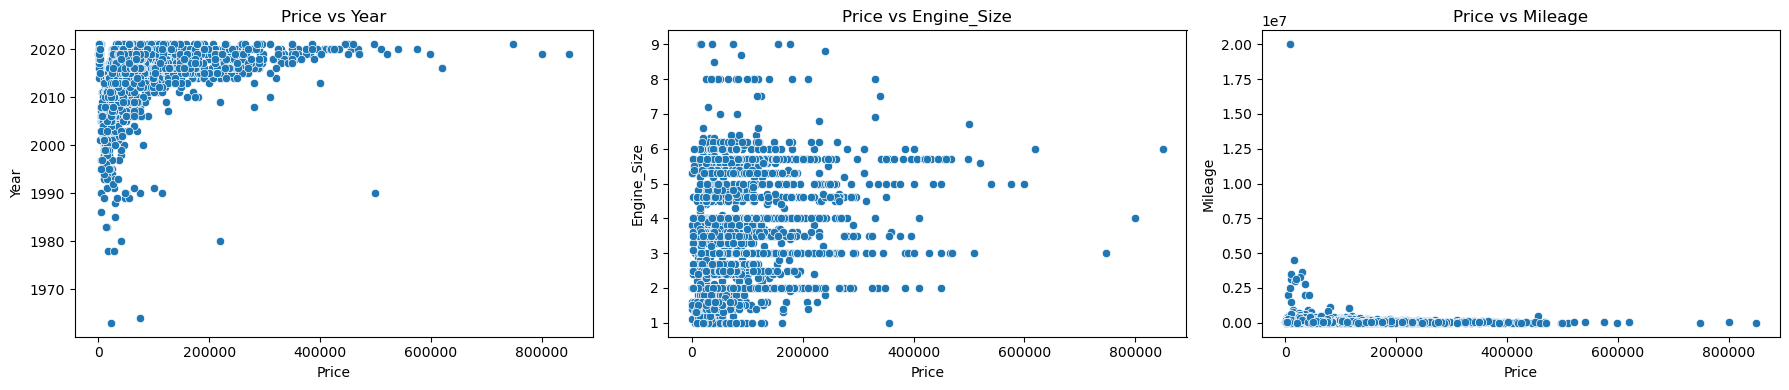

In [10]:
cols = ['Year','Engine_Size','Mileage']
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(18, 4))

for i, col in enumerate(cols):
    sns.scatterplot(data=df_new, x='Price', y=col, ax=axes[i])
    axes[i].set_title(f'Price vs {col}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

insight : 
- Korelasi terkuat terdapat pada kolom price dengan year dan merupakan korelasi positif. Semakin Baru tahun dari mobil tersebut maka akan semakin tinggi harganya.
- Korelasi price dengan engine_size juga cukup kuat dengan nilai korelasi positif. Semakin besar engine_size maka harganya juga akan semakin mahal.
- Sementara hubungan korelasi yang lemah terdapat pada kolom price dan mileage dengan nilai korelasi negatif. Artinya semakin tinggi/jauh jarak tempuh mobil (Mileage) maka akan semakin rendah/murah harganya.

**Distribusi Data Numerik**

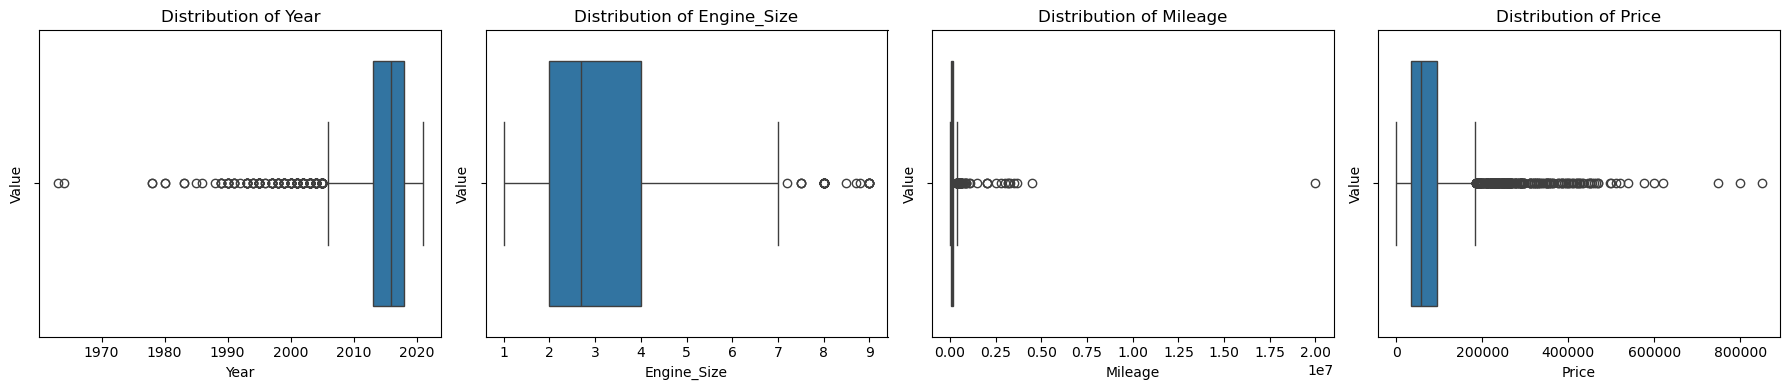

In [11]:
column = ['Year', 'Engine_Size', 'Mileage','Price']
fig, axes = plt.subplots(nrows=1, ncols=len(column), figsize=(18, 4))

for c, cols in enumerate(column):
    sns.boxplot(data=df_new, x=cols, ax=axes[c])  
    axes[c].set_title(f'Distribution of {cols}')
    axes[c].set_xlabel(cols)
    axes[c].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [12]:
med_year = df_new['Year'].median()
med_engine = df_new['Engine_Size'].median()
med_mile = df_new['Mileage'].median()
med_price = df_new['Price'].median()

med_year,med_engine,med_mile,med_price

(2016.0, 2.7, 103000.0, 58000.0)

Insight: 
- Median data year ada pada tahun 2016. Persebaran data year tidak merata dan year mobil paling banyak terdapat pada tahun 2016 ke bawah. Terdapat data outlier pada persebaran data year yang perlu penanganan pada data preprocessing.
- Median dari data engine size ada pada size 3. Persebaran data ini juga tidak merata dan engine size terbanyak terdapat pada engine size 3 ke atas. Terdapat data outlier pada persebaran data engine size yang perlu penanganan pada data preprocessing.
- Median data mileage terdapat pada jarak 103000. Persebaran data tidak merata dan terdapat banyak outlier yang perlu penanganan pada data preprocessing
- Median dari data price adalah 58000. Persebaran tidak merata dan data cenderung lebih banyak pada price diatas 58000. Terdapat banyak outlier pada data price

**Make Column**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26924\4193144820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new,x='Make',palette='Set2')


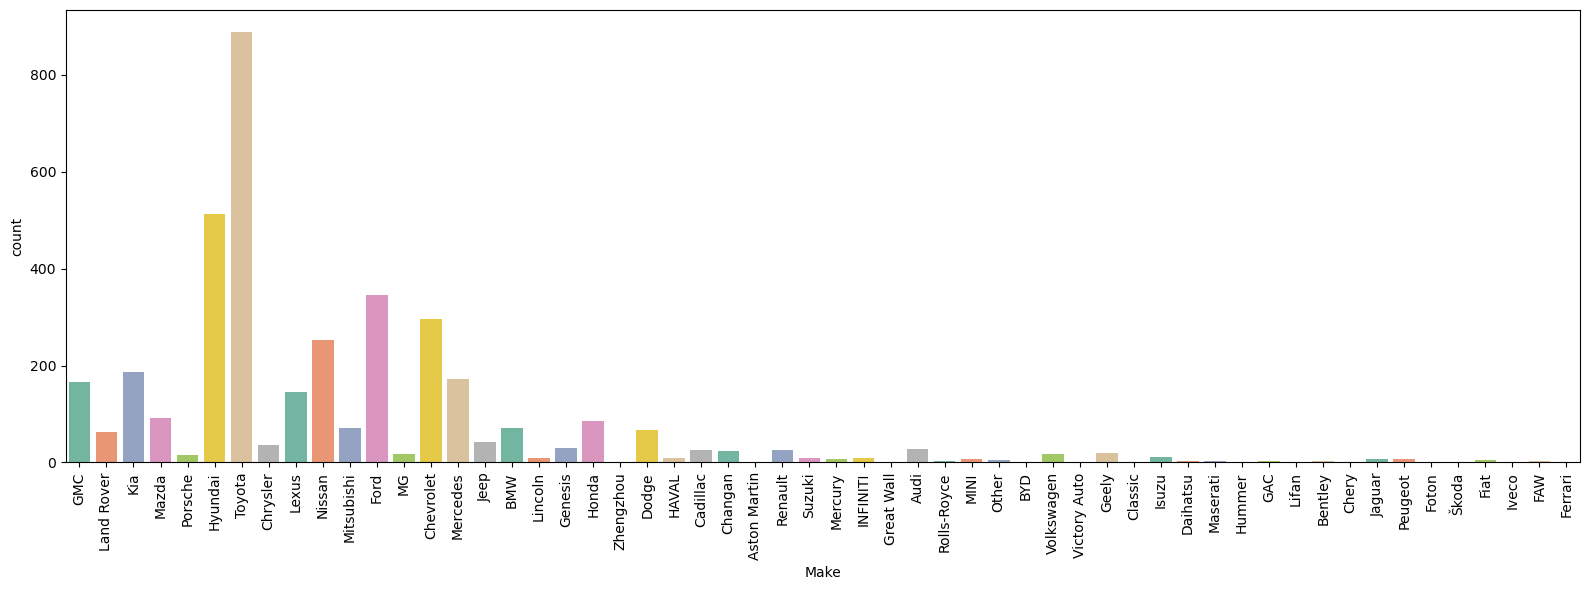

In [13]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df_new,x='Make',palette='Set2')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Mobil yang beredar paling banyak ada pada merk toyota kemudian diikuti oleh hyundai. Dapat diasumsikan bahwa sebagian besar masyarakat arab saudi menyukai merk toyota. Jumlah mobil toyota cukup signifikan bila dibandingkan dengan merek yang lain.

**Gear Type**

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26924\465143702.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new,x='Gear_Type',palette='Set2')


<Axes: xlabel='Gear_Type', ylabel='count'>

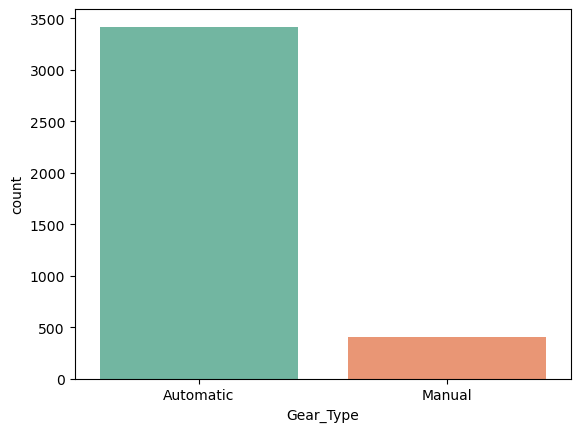

In [14]:
sns.countplot(data=df_new,x='Gear_Type',palette='Set2')

Sebagian besar data mobil menggunakan transmisi matic dan jumlahnya cukup signifikan. Dapat diasumsikan bahwa mayoritas masyarakat arab saudi lebih menyukai penggunaan mobil matic daripada manual.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26924\1301833733.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_new,x='Gear_Type',y='Price',palette='Set2')


<Axes: xlabel='Gear_Type', ylabel='Price'>

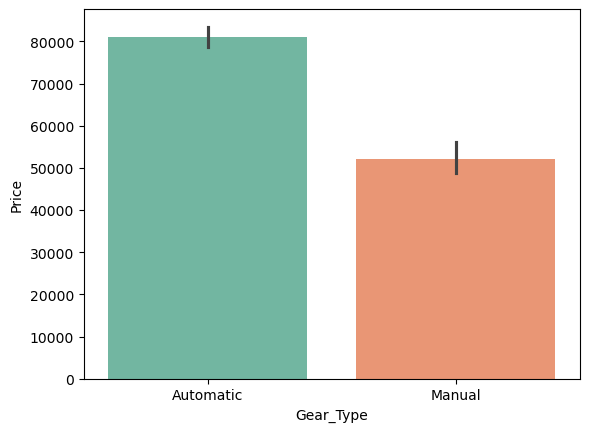

In [15]:
sns.barplot(data=df_new,x='Gear_Type',y='Price',palette='Set2')

Harga dari mobil berjenis transmisi matic lebih mahal bila dibandingkan dengan manual dan perbedaan harga cukup signifikan.

### **3. Define X,y**

Ubah data kolom bertipe boolean ke category/object

In [16]:
df_new['Negotiable'] = df_new['Negotiable'].astype('object')

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3824 non-null   object 
 1   Region       3824 non-null   object 
 2   Make         3824 non-null   object 
 3   Gear_Type    3824 non-null   object 
 4   Origin       3808 non-null   object 
 5   Options      3824 non-null   object 
 6   Year         3824 non-null   int64  
 7   Engine_Size  3824 non-null   float64
 8   Mileage      3824 non-null   int64  
 9   Negotiable   3824 non-null   object 
 10  Price        3824 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 328.8+ KB


In [18]:
X = df_new.drop(columns='Price')
y = df_new['Price']

X Merupakan feature untuk memprediksi price dan kolom yang digunakan semua kolom kecuali price. y merupakan target yang akan diprediksi yaitu price

### **4.Data Splitting**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                 y,
                 test_size=0.2,
                 random_state=42)

Tidak memakai stratify = y karena target merupakan jenis data numerik kontinu. stratify = y dipakai ketika target merupakan klasifikasi 

### **5.Preprocessing**

In [20]:
df_new.columns

Index(['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options', 'Year',
       'Engine_Size', 'Mileage', 'Negotiable', 'Price'],
      dtype='object')

Data Preprocessing : 

- Binary encode : Type, Region, Make (Hal ini karena jumlah data kategori tersebut sangatlah banyak)
- Onehot encode : Gear_Type, Origin,Options,Negotiable (Karena jumlah data kategori hanya sedikit)
- Robust Scaling: Year, Engine_Size,Mileage (Dilakukan robust scalling karena banyak data outlier di data jenis numerik ini)
- Mengisi data kosong dengan Simple imputer pada kolom origin menggunakan modus karena data berjenis kategorikal

In [21]:
pipe_input_encode = Pipeline([
   ('simpleimpt',SimpleImputer(strategy='most_frequent')),
   ('onehot',OneHotEncoder())
])
Transformer = ColumnTransformer([
    ('Binary',BinaryEncoder(),['Type','Region','Make']),
    ('Onehot',OneHotEncoder(),['Gear_Type','Options','Negotiable']),
    ('Inputer',pipe_input_encode,['Origin']),
    ('Robust',RobustScaler(),['Year','Engine_Size','Mileage'])
],remainder='passthrough')

### **6.CrossValidation**

In [22]:
linreg = LinearRegression()
logreg_lasso = Lasso(random_state=42)
logreg_ridge = Ridge(random_state=42)
tree = DecisionTreeRegressor(random_state=42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state=42)
voting = VotingRegressor(estimators=[('clf1',logreg_lasso),
                                     ('clf2',tree),
                                     ('clf3',knn)])
stacking = StackingRegressor(estimators=[('clf1',logreg_lasso),
                                         ('clf2',tree),
                                         ('clf3',knn)],final_estimator=logreg_lasso)
bagging = BaggingRegressor(random_state=42,estimator=knn)
aboost = AdaBoostRegressor(random_state=42)
gboost = GradientBoostingRegressor(random_state=42)
xboost = XGBRegressor(random_state=42 )

scoring = {
    'RMSE' : 'neg_root_mean_squared_error',
    'MAE' : 'neg_mean_absolute_error',
    'MAPE' : 'neg_mean_absolute_percentage_error'
}

model = [linreg,logreg_lasso,logreg_ridge,tree,knn,rf,voting,stacking,bagging,aboost,aboost,gboost,xboost]
#rmse
cv_rmse = []
cv_rmse_mean = []
cv_rmse_std = []
#mae
cv_mae = []
cv_mae_mean = []
cv_mae_std = []
#mape
cv_mape = []
cv_mape_mean = []
cv_mape_std = []

for i in model:
    pipe_model = Pipeline([('preprocessing',Transformer),
                           ('modeling',i)])
    cross_val = cross_validate(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring=scoring
    )
#rmse
    cv_rmse.append(-cross_val['test_RMSE'].round(2))
    cv_rmse_mean.append(-cross_val['test_RMSE'].mean().round(2))
    cv_rmse_std.append(-cross_val['test_RMSE'].std())
#mae
    cv_mae.append(-cross_val['test_MAE'].round(2))
    cv_mae_mean.append(-cross_val['test_MAE'].mean().round(2))
    cv_mae_std.append(-cross_val['test_MAE'].std())
#mape
    cv_mape.append(-cross_val['test_MAPE'].round(2))
    cv_mape_mean.append(-cross_val['test_MAPE'].mean().round(2))
    cv_mape_std.append(-cross_val['test_MAPE'].std())


In [23]:
df_cv = pd.DataFrame()
df_cv['Model'] = model
df_cv['RMSE_score']= cv_rmse
df_cv['RMSE_mean'] = cv_rmse_mean
df_cv['RMSE_std'] = cv_rmse_std
df_cv['MAE_score'] = cv_mae
df_cv['MAE_mean'] = cv_mae_mean
df_cv['MAE_std'] = cv_mae_std
df_cv['MAPE_score'] = cv_mape
df_cv['MAPE_mean'] = cv_mape_mean
df_cv['MAPE_std'] = cv_mape_std
df_cv

,Model,RMSE_score,RMSE_mean,RMSE_std,MAE_score,MAE_mean,MAE_std,MAPE_score,MAPE_mean,MAPE_std
0,LinearRegression(),"[58609.29, 52038.21, 56735.53, 46641.0, 54920.34]",53788.87,-4179.864585,"[34625.53, 32474.17, 34001.03, 32174.4, 31801.94]",33015.41,-1098.786116,"[158.36, 1.0, 1.45, 1.08, 1.83]",32.74,-62.806591
1,Lasso(random_state=42),"[58609.53, 52038.37, 56736.54, 46638.53, 54921...",53788.90,-4180.955048,"[34623.71, 32472.69, 34000.25, 32172.01, 31801.1]",33013.95,-1098.813241,"[158.41, 1.0, 1.45, 1.08, 1.83]",32.75,-62.826759
2,Ridge(random_state=42),"[58609.34, 52032.62, 56744.14, 46622.66, 54925...",53786.77,-4188.088306,"[34614.38, 32460.52, 33996.35, 32160.78, 31793...",33005.16,-1099.921619,"[158.55, 1.0, 1.45, 1.08, 1.83]",32.78,-62.885994
3,DecisionTreeRegressor(random_state=42),"[62571.89, 43928.93, 58652.66, 51766.39, 61046...",55593.35,-6906.588600,"[26965.39, 23511.28, 27886.55, 25985.5, 30117.71]",26893.29,-2174.887961,"[286.91, 0.87, 1.6, 0.69, 1.68]",58.35,-114.279769
4,KNeighborsRegressor(),"[45138.08, 37551.59, 44312.68, 32777.32, 46088...",41173.64,-5164.184848,"[22666.65, 21554.74, 23354.1, 19642.72, 22054.03]",21854.45,-1259.365499,"[187.71, 0.75, 1.34, 0.75, 1.47]",38.40,-74.652608
5,RandomForestRegressor(random_state=42),"[40057.21, 27817.38, 40448.3, 34386.44, 43641.13]",37270.09,-5587.993910,"[18677.79, 15566.57, 21178.88, 19202.69, 19626...",18850.50,-1841.831954,"[288.82, 0.71, 1.45, 0.83, 1.61]",58.69,-115.067628
6,"VotingRegressor(estimators=[('clf1', Lasso(ran...","[44329.19, 34839.19, 43428.61, 34339.95, 47179...",40823.33,-5240.726859,"[21750.87, 20662.7, 22138.4, 21270.94, 23018.27]",21768.24,-796.167872,"[210.91, 0.78, 1.37, 0.74, 1.55]",43.07,-83.921508
7,"StackingRegressor(estimators=[('clf1', Lasso(r...","[42081.46, 34083.26, 41269.08, 31351.41, 45057...",38768.52,-5171.918271,"[20202.19, 19388.07, 20616.81, 17995.7, 21018.85]",19844.32,-1070.501179,"[204.08, 0.69, 1.27, 0.64, 1.43]",41.62,-81.228582
8,BaggingRegressor(estimator=KNeighborsRegressor...,"[45118.63, 36586.88, 44058.07, 31492.38, 46047...",40660.63,-5675.981851,"[22611.44, 21363.89, 22954.86, 18816.83, 22168.3]",21583.07,-1482.023076,"[197.35, 0.76, 1.33, 0.73, 1.5]",40.33,-78.508069
9,AdaBoostRegressor(random_state=42),"[67024.56, 53870.34, 63957.87, 61628.53, 72330...",63762.38,-6107.366208,"[53517.21, 45674.75, 48865.0, 49998.6, 55826.64]",50776.44,-3558.149753,"[281.43, 1.81, 2.64, 2.03, 3.23]",58.23,-111.601500


Dari hasil cross validation didapat model terbaik ada pada XGBoost regressor dengan nilai rmse dan nilai mae terendah bila dibandingkan dengan model lain.

### **7.Predict Sebelum Tunning**

In [24]:
Pipe_XGB = Pipeline([('Preprocessing',Transformer),
                     ('modeling',xboost)])

score_rmse = []
score_mae = []
score_mape = []

Pipe_XGB.fit(X_train,y_train)
y_predict_before = Pipe_XGB.predict(X_test)
score_rmse.append(np.sqrt(mean_squared_error(y_test,y_predict_before)))
score_mae.append((mean_absolute_error(y_test,y_predict_before)))
score_mape.append((mean_absolute_percentage_error(y_test,y_predict_before)))

df_before = pd.DataFrame()
df_before['RMSE'] = score_rmse
df_before['MAE'] = score_mae
df_before['MAPE'] = score_mape
df_before


,RMSE,MAE,MAPE
0,29714.131318,17258.818359,1.23266


### **8. Tunning**

In [25]:
param_grid = {
    'modeling__max_depth': list(np.arange(1,11)),
    'modeling__learning_rate':list(np.arange(1, 101)/100),
    'modeling__n_estimator':list(np.arange(100,201)),
    'modeling__subsample':list(np.arange(2, 10)/10),
    'modeling__gamma':list(np.arange(1,11)),
    'modeling__colsample_bytree':list(np.arange(1, 10)/10),
    'modeling__reg_alpha':list(np.logspace(-3, 1, 10))
}
scoring = {
    'RMSE' : 'neg_root_mean_squared_error',
    'MAE' : 'neg_mean_absolute_error',
    'MAPE' : 'neg_mean_absolute_percentage_error'
}
crossval = KFold(n_splits=5, shuffle=True, random_state=1)
rand_search = RandomizedSearchCV(
    Pipe_XGB,
    param_distributions= param_grid,
    n_iter= 100,
    cv=crossval,
    scoring=scoring,
    refit='RMSE',
    random_state=42,
    
)


In [26]:
rand_search.fit(X_train,y_train)

c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:35:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:35:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:35:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:35:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fo

,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'modeling__colsample_bytree': [0.1, 0.2, ...], 'modeling__gamma': [1, 2, ...], 'modeling__learning_rate': [0.01, 0.02, ...], 'modeling__max_depth': [1, 2, ...], ...}"
,n_iter,100
,scoring,"{'MAE': 'neg_mean_absolute_error', 'MAPE': 'neg_mean_absolute_percentage_error', 'RMSE': 'neg_root_mean_squared_error'}"
,n_jobs,None
,refit,'RMSE'
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [27]:
print('XGBoost')
print('Best_score:', -rand_search.best_score_)
print('Best_params:', rand_search.best_params_)

XGBoost
Best_score: 36523.516796875
Best_params: {'modeling__subsample': 0.7, 'modeling__reg_alpha': 10.0, 'modeling__n_estimator': 125, 'modeling__max_depth': 10, 'modeling__learning_rate': 0.04, 'modeling__gamma': 3, 'modeling__colsample_bytree': 0.6}


### **9.Predict dengan hasil tunning**

In [28]:
score_rmse_tunning = []
score_mae_tunning = []
score_mape_tunning = []


xboost_tunning = rand_search.best_estimator_
xboost_tunning.fit(X_train,y_train)
y_predict_after = xboost_tunning.predict(X_test)

score_rmse_tunning.append(np.sqrt(mean_squared_error(y_test,y_predict_after)))
score_mae_tunning.append(mean_absolute_error(y_test,y_predict_after))
score_mape_tunning.append(mean_absolute_percentage_error(y_test,y_predict_after))

df_tuning = pd.DataFrame()
df_tuning['rmse_tunning'] = score_rmse_tunning
df_tuning['mae_tunning'] = score_mae_tunning
df_tuning['mape_tunning'] = score_mape_tunning
df_tuning


c:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:38:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,rmse_tunning,mae_tunning,mape_tunning
0,29768.496637,16975.611328,1.351406


**Perbandingan After Tunning Vs Before Tunning**

In [29]:
df_before,df_tuning

(           RMSE           MAE     MAPE
 0  29714.131318  17258.818359  1.23266,
    rmse_tunning   mae_tunning  mape_tunning
 0  29768.496637  16975.611328      1.351406)

Hasil Tunning menunjukkan bahwa RMSE nya lebih besar daripada RMSE sebelum tunning namun tidak terlalu signifikan. Sementara MAE dan MAPE hasil tunning menunjukkan nilai yang lebih kecil dari sebelum tunning namun juga tidak terlalu signifikan. Dari Hasil Tunning dan sebelum tunning ini kita akan menggunakan machine learning model sebelum tuning karena hasil RMSE nya lebih kecil dari sesudah dilakukan tunning.

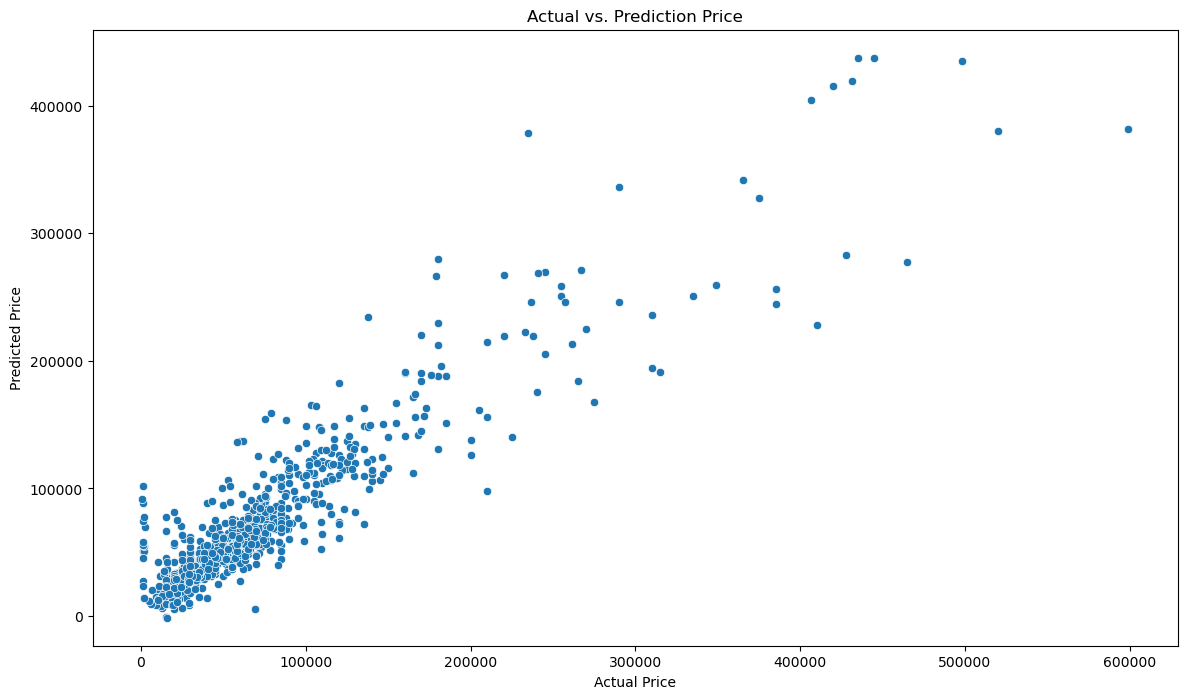

In [30]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_predict_before).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price')

### **10.Feature Importance**

In [31]:
from xgboost import plot_importance

In [32]:
xboost.feature_importances_

array([0.00569539, 0.01747037, 0.01746733, 0.0431571 , 0.0303322 ,
       0.01861597, 0.01421179, 0.02049086, 0.00582921, 0.00740977,
       0.00816221, 0.00295705, 0.01039036, 0.01102783, 0.08887252,
       0.02317371, 0.06995029, 0.07758258, 0.06061484, 0.1021868 ,
       0.00619172, 0.        , 0.14654341, 0.00490584, 0.00765426,
       0.        , 0.01171345, 0.00692074, 0.01918371, 0.07566441,
       0.06682695, 0.01879733], dtype=float32)

<Axes: title={'center': 'Feature Importances'}>

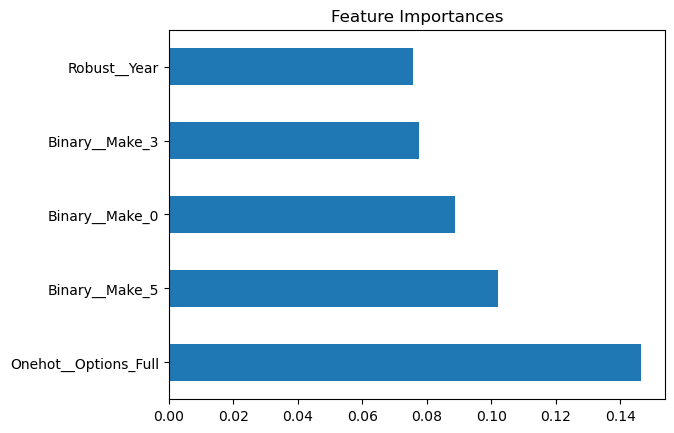

In [33]:
feature_imp = pd.Series(xboost.feature_importances_, Transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances')

In [34]:
df_new

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000
...,...,...,...,...,...,...,...,...,...,...,...
3819,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,False,132000
3820,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,False,50000
3821,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
3822,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000


In [35]:
df_new['Negotiable'].unique()

array([False], dtype=object)

### **11.Kesimpulan & Rekomendasi**

**Kesimpulan**

Machine learning yang dibuat untuk memprediksi harga mobil di arab saudi menggunakan model XGBRegressor karena setelah dilakukan beberapa perlakuan dengan membandingkan beberapa model, model ini mendapatkan hasil terbaik. Setelah dilakukan tunning, hasil yang didapat ternyata model sebelum ditunning mendapat hasil yang lebih baik daripada setelah ditunning walaupun dengan hasil perbedaan yang tidak terlalu signifikan dan akan menggunakan model sebelum ditunning untuk melakukan prediksi harga. Metric evaluasi untuk machine learning ini menggunakan RMSE,MAE,dan MAPE. Nilai MAPE sebelum ditunning adalah 123% yang memiliki arti bahwa prediksi harga rata - rata mobil akan meleset kurang lebih 123% dari harga aktualnya. Kolom yang paling mempengaruhi prediksi harga kolom options yang merupakan kolom terkait fitur yang tersedia di mobil tersebut, merk mobil atau kolom make, dan tahun pembuatan mobil.

**Rekomendasi**


Model Machine Learning ini dapat digunakan dalam kondisi Saat tersedia data kendaraan yang lengkap dan valid (fitur penting seperti tahun, jarak tempuh, brand, dan kondisi kendaraan). Model ini juga dapat digunakan untuk kendaraan dengan karakteristik umum/populer yang sering muncul dalam data latih, karena model telah belajar dari pola tersebut Ketika dealer ingin menetapkan harga awal pasar berdasarkan data historis dan tren aktual. Model memiliki kelemahan untuk memprediksi harga mobil yang langka, eksklusif, atau baru masuk pasar (karena belum ada data historis yang cukup).Penggunaan model ini dapat mengurangi waktu pengambilan keputusan dan mengoptimalkan strategi penjualan berdasarkan data serta emungkinkan perencanaan stok dan pembelian mobil bekas secara lebih efisien karena harga lebih terprediksi. Namun Model Machine learning masih perlu dievaluasi dan ditingkatkan akurasinya dengan penggunaan gridsearch  agar dapat menemukan price prediction yang lebih akurat dengan persentase MAPE yang bisa lebih ditekan. Akurasi model ini masih belum terlalu akurat dikarenakan juga keterbatasan data yang diperoleh.


### **12.Save Model**

In [36]:
import pickle
estimator = Pipeline([('Preprocessing',Transformer),
                     ('modeling',xboost)])
estimator.fit(X_train,y_train) 

pickle.dump(estimator,open('Used_Car_Saudi_Model_XGB.sav','wb'))